In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Options Data and Visualling the Strike Prices
Chose HDFC Bank as my stock option of choice given its high trading volume and no stock split/bonus in the backtest period.

In [ ]:
df_call = pd.read_csv('/content/OPTSTK_HDFCBANK_PE_26-Sep-2024_TO_26-Dec-2024.csv')
df_call.head()

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value
0,HDFCBANK,27-Sep-2024,26-Dec-2024,PE,1560.0,-,-,-,11.70,-,15.05,-,-,-,-,-,1752.65
1,HDFCBANK,27-Sep-2024,26-Dec-2024,PE,1600.0,9.60,14.65,9.60,14.65,14.65,14.65,2.00,17.73,0.13,550.00,550.00,1752.65
2,HDFCBANK,27-Sep-2024,26-Dec-2024,PE,1640.0,-,-,-,25.45,-,31.70,-,-,-,-,-,1752.65
3,HDFCBANK,27-Sep-2024,26-Dec-2024,PE,1660.0,-,-,-,30.30,-,37.25,-,-,-,-,-,1752.65
4,HDFCBANK,27-Sep-2024,26-Dec-2024,PE,1680.0,-,-,-,35.65,-,43.55,-,-,-,-,-,1752.65


In [ ]:
df_call.columns

Index(['Symbol  ', 'Date  ', 'Expiry  ', 'Option type  ', 'Strike Price  ',
       'Open  ', 'High  ', 'Low  ', 'Close  ', 'LTP  ', 'Settle Price  ',
       'No. of contracts  ', 'Turnover * in  ₹ Lakhs',
       'Premium Turnover ** in   ₹ Lakhs', 'Open Int  ', 'Change in OI  ',
       'Underlying Value  '],
      dtype='object')

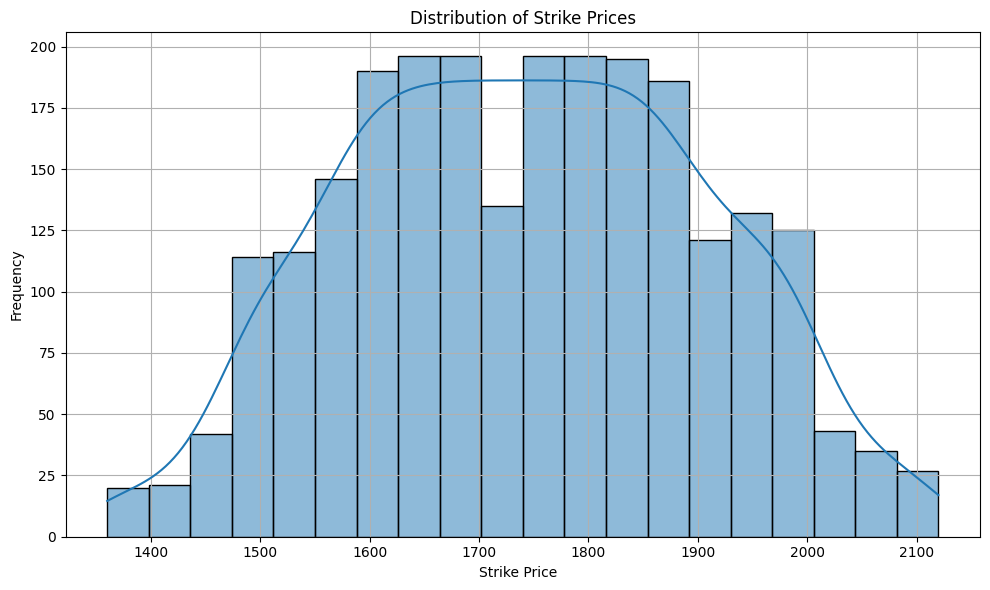

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_call['Strike Price  '].dropna(), bins=20, kde=True)
plt.title('Distribution of Strike Prices')
plt.xlabel('Strike Price  ')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()
#Plotted the strike pices...was fun to realize for myself the normal distribution.

In [ ]:
df_put = pd.read_csv('/content/OPTSTK_HDFCBANK_PE_26-Sep-2024_TO_26-Dec-2024.csv')
df_put.head()

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value
0,HDFCBANK,27-Sep-2024,26-Dec-2024,PE,1560.0,-,-,-,11.70,-,15.05,-,-,-,-,-,1752.65
1,HDFCBANK,27-Sep-2024,26-Dec-2024,PE,1600.0,9.60,14.65,9.60,14.65,14.65,14.65,2.00,17.73,0.13,550.00,550.00,1752.65
2,HDFCBANK,27-Sep-2024,26-Dec-2024,PE,1640.0,-,-,-,25.45,-,31.70,-,-,-,-,-,1752.65
3,HDFCBANK,27-Sep-2024,26-Dec-2024,PE,1660.0,-,-,-,30.30,-,37.25,-,-,-,-,-,1752.65
4,HDFCBANK,27-Sep-2024,26-Dec-2024,PE,1680.0,-,-,-,35.65,-,43.55,-,-,-,-,-,1752.65


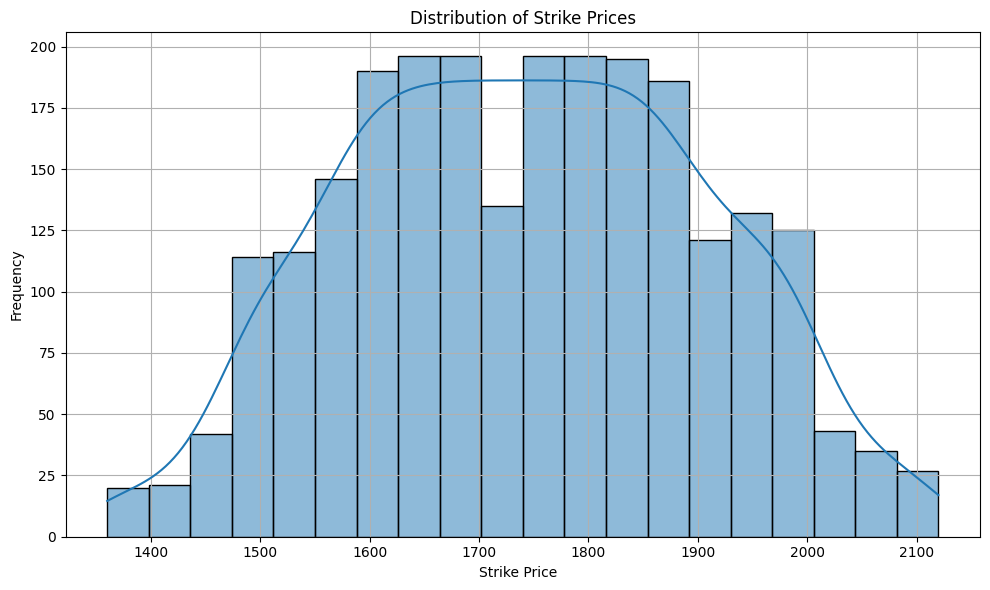

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_put['Strike Price  '].dropna(), bins=20, kde=True)
plt.title('Distribution of Strike Prices')
plt.xlabel('Strike Price  ')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()
#Plotted the strike pices...was fun to realize for myself the normal distribution.

In [ ]:
df_call.columns

Index(['Symbol  ', 'Date  ', 'Expiry  ', 'Option type  ', 'Strike Price  ',
       'Open  ', 'High  ', 'Low  ', 'Close  ', 'LTP  ', 'Settle Price  ',
       'No. of contracts  ', 'Turnover * in  ₹ Lakhs',
       'Premium Turnover ** in   ₹ Lakhs', 'Open Int  ', 'Change in OI  ',
       'Underlying Value  '],
      dtype='object')

# Analyzing HDFCBANK's stock performance with the help of ATR to judge its Volatility level.

In [ ]:
import yfinance as yf
df_r = yf.download('HDFCBANK.NS', start='2023-12-31', end='2024-12-30')
df_r.reset_index(inplace=True)
df_r

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,2024-01-01,1675.223999,1686.125187,1669.206199,1683.017598,7119843
1,2024-01-02,1676.210571,1679.860799,1665.950651,1675.914685,14621046
2,2024-01-03,1650.363525,1681.735059,1646.466666,1679.071480,14194881
3,2024-01-04,1668.071777,1672.116520,1648.193203,1655.394910,13367028
4,2024-01-05,1659.538208,1681.932477,1645.628180,1664.421596,15944735
...,...,...,...,...,...,...
239,2024-12-20,1771.500000,1797.550049,1767.050049,1782.199951,12846174
240,2024-12-23,1801.000000,1806.000000,1781.300049,1782.000000,5522296
241,2024-12-24,1798.099976,1808.699951,1789.550049,1802.050049,7242917


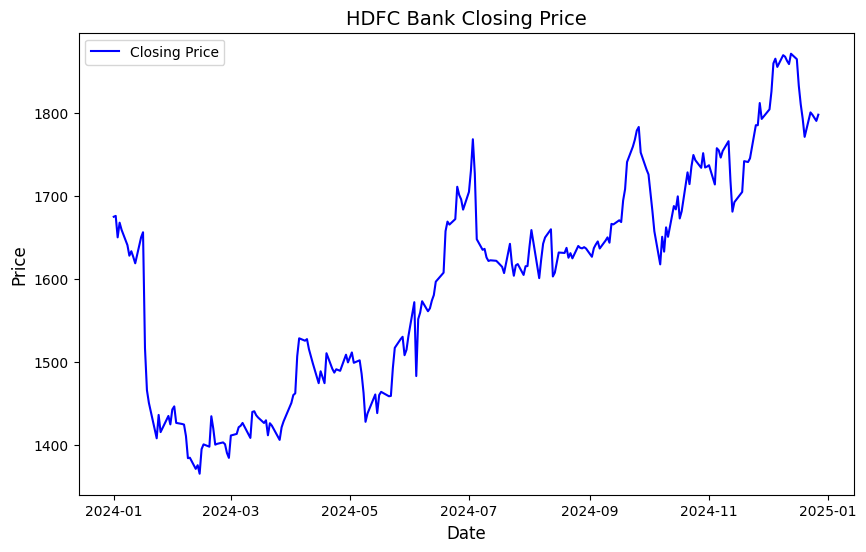

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_r['Date'], df_r['Close'], label='Closing Price', color='blue')
plt.title('HDFC Bank Closing Price', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.show()
#Plotting HDFCBANK's Closing Price to get an idea of the stock movement

In [ ]:
def atr(data, atr_period=14, atr_multiplier=2.0, high_vol_threshold=30, low_vol_threshold=20):

    # Compute True Range components
    high_low_diff = data['High'] - data['Low']
    high_close_diff = abs(data['High'] - data['Close'].shift(1))
    low_close_diff = abs(data['Low'] - data['Close'].shift(1))

    # Compute True Range (TR)
    data['TrueRange'] = pd.concat([high_low_diff, high_close_diff, low_close_diff], axis=1).max(axis=1)

    # Calculate Average True Range (ATR)
    data['AverageTrueRange'] = data['TrueRange'].rolling(window=atr_period).mean()

    # Define stop-loss and take-profit levels
    atr_values = data['AverageTrueRange']
    data['StopLoss'] = data['Close']['HDFCBANK.NS'] - atr_multiplier * atr_values
    data['TakeProfit'] = data['Close']['HDFCBANK.NS'] + atr_multiplier * atr_values

    # Add volatility signals
    data['High_Volatility'] = data['AverageTrueRange'] > high_vol_threshold
    data['Low_Volatility'] = data['AverageTrueRange'] < low_vol_threshold

    # Remove unnecessary columns
    data.drop(columns=['TrueRange'], inplace=True)

    return data


In [ ]:
df_r = atr(df_r)
df_r.head()

Price,Date,Close,High,Low,Open,Volume,AverageTrueRange,StopLoss,TakeProfit,High_Volatility,Low_Volatility
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,,,,,
0,2024-01-01,1675.223999,1686.125187,1669.206199,1683.017598,7119843,NaN,NaN,NaN,False,False
1,2024-01-02,1676.210571,1679.860799,1665.950651,1675.914685,14621046,NaN,NaN,NaN,False,False
2,2024-01-03,1650.363525,1681.735059,1646.466666,1679.071480,14194881,NaN,NaN,NaN,False,False
3,2024-01-04,1668.071777,1672.116520,1648.193203,1655.394910,13367028,NaN,NaN,NaN,False,False
4,2024-01-05,1659.538208,1681.932477,1645.628180,1664.421596,15944735,NaN,NaN,NaN,False,False


# Cleaning The Dataset

In [ ]:
# Only keeping the columns required for the strategy
columns_to_keep = ['Symbol  ', 'Date  ', 'Expiry  ','Strike Price  ','LTP  ','Underlying Value  ']


df_call = df_call[columns_to_keep]
df_put = df_put[columns_to_keep]

In [ ]:
df = pd.merge(df_put, df_call, on=['Symbol  ','Date  ', 'Expiry  ', 'Strike Price  ','Underlying Value  '], how='inner')

In [ ]:
# Rename columns
df.rename(columns={'Expiry  ': '[EXPIRE_DATE]', 'LTP  _x': '[P_LAST]','LTP  _y': '[C_LAST]','Underlying Value  ': ' [UNDERLYING_LAST]','Strike Price  ': '[STRIKE]','Date  ': '[QUOTE_DATE]'}, inplace=True)

In [ ]:
# Replace '-' with 0 in the entire dataframe
#The DataFrame has - for option premium's that weren't bought..replaced them with NaN values
df.replace('-', np.NaN, inplace=True)

In [ ]:
# These two columns had object datatype in them...converted them to numberic data
df['[C_LAST]'] = pd.to_numeric(df['[C_LAST]'], errors='coerce')
df['[P_LAST]'] = pd.to_numeric(df['[P_LAST]'], errors='coerce')

In [ ]:
# Foward filling the NaN values
df['[P_LAST]'].interpolate(method = 'ffill', inplace=True)
df['[C_LAST]'].interpolate(method = 'ffill', inplace=True)

In [ ]:
df.head()

,Symbol,[QUOTE_DATE],[EXPIRE_DATE],[STRIKE],[P_LAST],[UNDERLYING_LAST],[C_LAST]
0,HDFCBANK,27-Sep-2024,26-Dec-2024,1560.0,NaN,1752.65,NaN
1,HDFCBANK,27-Sep-2024,26-Dec-2024,1600.0,14.65,1752.65,14.65
2,HDFCBANK,27-Sep-2024,26-Dec-2024,1640.0,14.65,1752.65,14.65
3,HDFCBANK,27-Sep-2024,26-Dec-2024,1660.0,14.65,1752.65,14.65
4,HDFCBANK,27-Sep-2024,26-Dec-2024,1680.0,14.65,1752.65,14.65


In [ ]:
df.set_index('[QUOTE_DATE]', inplace=True)
options_data = df
options_data.rename(columns = {'[UNDERLYING_LAST]':' [UNDERLYING_LAST]','[C_LAST]':' [C_LAST]','[P_LAST]':' [P_LAST]'},inplace = True)

In [ ]:
import pandas as pd

# Convert to datetime format
df_r['Date_'] = pd.to_datetime(df_r['Date'])
options_data.index = pd.to_datetime(options_data.index)

# Flatten multi-level columns in df (if necessary)
if isinstance(df_r.columns, pd.MultiIndex):
    df_r.columns = ['_'.join(col).strip() for col in df_r.columns.values]

# Reset the index of options_data
options_data_reset = options_data.reset_index()

# Perform the merge
merged_data = options_data_reset.merge(
    df_r[['Date_', 'High_Volatility_', 'Low_Volatility_']],
    left_on='[QUOTE_DATE]',  # Use reset column
    right_on='Date_',         # Match with df_r's Date column
    how='left'               # Left join to preserve options_data rows
)

# Drop the redundant 'Date' column from the merged data
merged_data.drop(columns=['Date_'], inplace=True)

# Restore the index to [QUOTE_DATE]
merged_data.set_index('[QUOTE_DATE]', inplace=True)

# Display the resulting dataframe
print(merged_data)


              Symbol   [EXPIRE_DATE]  [STRIKE]   [P_LAST]   [UNDERLYING_LAST]  \
[QUOTE_DATE]                                                                    
2024-09-27    HDFCBANK   26-Dec-2024    1560.0        NaN             1752.65   
2024-09-27    HDFCBANK   26-Dec-2024    1600.0      14.65             1752.65   
2024-09-27    HDFCBANK   26-Dec-2024    1640.0      14.65             1752.65   
2024-09-27    HDFCBANK   26-Dec-2024    1660.0      14.65             1752.65   
2024-09-27    HDFCBANK   26-Dec-2024    1680.0      14.65             1752.65   
...                ...           ...       ...        ...                 ...   
2024-12-26    HDFCBANK   26-Dec-2024    2040.0     243.80             1790.75   
2024-12-26    HDFCBANK   26-Dec-2024    2060.0     262.25             1790.75   
2024-12-26    HDFCBANK   26-Dec-2024    2080.0     262.25             1790.75   
2024-12-26    HDFCBANK   26-Dec-2024    2100.0     300.00             1790.75   
2024-12-26    HDFCBANK   26-

In [ ]:
options_data = merged_data

# Strategy
The strategy is to long strangle if volatility is expected to rise. while short strangle if volatility is expected to fall.This is a Delta-Neutral Strategy given I am trading on volatility alone and not market direction.

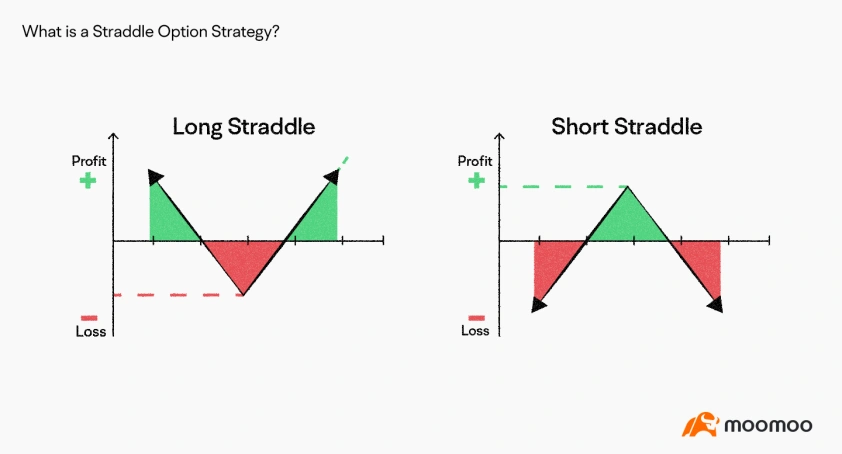

In [ ]:
# Set the strike multiple
strike_multiple = 40

# Set the ATM strike price
options_data['ATM'] = strike_multiple * \
    (round(options_data[' [UNDERLYING_LAST]'] / strike_multiple))

# Ensure the index is in datetime format
options_data.index = pd.to_datetime(options_data.index)



# Check whether the volatility is High
options_data['condition_1'] = options_data.High_Volatility_

# Check whether the volatility is low
options_data['condition_2'] = options_data.Low_Volatility_

# Making the signal column
options_data['signal'] = np.where(
    options_data['condition_1'] , 1, np.where(
    options_data['condition_2'] , -1, 1))


# Drop any missing values
options_data = options_data.dropna()

# Print first 5 rows of the dataframe
options_data.head()

,Symbol,[EXPIRE_DATE],[STRIKE],[P_LAST],[UNDERLYING_LAST],[C_LAST],High_Volatility_,Low_Volatility_,ATM,condition_1,condition_2,signal
[QUOTE_DATE],,,,,,,,,,,,
2024-09-27,HDFCBANK,26-Dec-2024,1600.0,14.65,1752.65,14.65,False,False,1760.0,False,False,1
2024-09-27,HDFCBANK,26-Dec-2024,1640.0,14.65,1752.65,14.65,False,False,1760.0,False,False,1
2024-09-27,HDFCBANK,26-Dec-2024,1660.0,14.65,1752.65,14.65,False,False,1760.0,False,False,1
2024-09-27,HDFCBANK,26-Dec-2024,1680.0,14.65,1752.65,14.65,False,False,1760.0,False,False,1
2024-09-27,HDFCBANK,26-Dec-2024,1700.0,14.65,1752.65,14.65,False,False,1760.0,False,False,1


In [ ]:
# Create dataframes for round trips, storing trades, and mtm
round_trips_details = pd.DataFrame()
trades = pd.DataFrame()
mark_to_market = pd.DataFrame()

# Function for calculating mtm


def add_to_mtm(mark_to_market, option_strategy, trading_date):
    option_strategy['Date'] = trading_date
    mark_to_market = pd.concat([mark_to_market, option_strategy])
    return mark_to_market

# Function for fetching premium


def get_premium(options_strategy, options_data):

    # Get the premium for call option
    if options_strategy['Option Type'] == "CE":
        return options_data[' [C_LAST]']

    # Get the premium for put option
    elif options_strategy['Option Type'] == "PE":
        return options_data[' [P_LAST]']

# Function for setting up a straddle


def setup_straddle(options_data, direction='short'):

    # Create a dataframe to store the straddle
    straddle = pd.DataFrame()

    # CE and PE legs of the straddle
    straddle['Option Type'] = ['CE', 'PE']

    # Create the straddle at ATM
    straddle['Strike Price'] = options_data.ATM[0]

    # Sell positions for both CE and PE legs in case of a short straddle
    straddle['position'] = -1

    # Get the premiums for the two option legs of the short straddle
    straddle['premium'] = straddle.apply(
        lambda r: get_premium(r, options_data), axis=1)

    # Multiply the position by -1 in case of a long straddle
    if direction == 'long':
        straddle['position'] *= -1

    # Get the premiums for the two option legs of the long straddle
    straddle['premium'] = straddle.apply(
        lambda r: get_premium(r, options_data), axis=1)

    return straddle


# Initialise current position, number of trades and cumulative pnl to 0
current_position = 0
trade_num = 0
cum_pnl = 0
counter = 0

# Set exit flag to False
exit_flag = False

# Set start date for backtesting
start_date = options_data.index[0]

In [ ]:
config = {
    'stop_loss_percentage': 40,
    'take_profit_percentage': 60,
}
# The optimal values for Take Profit and Stoploss were decided on running the backtester and checking how many times they were hit.

In [ ]:
for i in (options_data.loc[start_date:].index.unique()):

    # Today's options data
    today_data = options_data.loc[i]

    if current_position == 1:
        # Update the counter
        counter = counter + 1

        # Setup strike data
        setup_strike_data = today_data[today_data['[STRIKE]'] == setup_strike]

        # Update net premium
        straddle['premium'] = straddle.apply(
            lambda r: get_premium(r, setup_strike_data), axis=1)



        # Ensure net_premium is a float, handle missing or non-numeric values
        straddle['premium'] = pd.to_numeric(straddle['premium'], errors='coerce').fillna(0)

        net_premium = (straddle.position * straddle.premium).sum()
        net_premium = round(net_premium, 1)

        # Update mark_to_market dataframe
        mark_to_market = add_to_mtm(mark_to_market, straddle, i)

        # Exit the trade if any of the exit condition is met
        if counter == 5:
            exit_type = 'Rebalance'
            exit_flag = True

        elif net_premium < sl:
            exit_type = 'SL'
            exit_flag = True

        elif net_premium > tp:
            exit_type = 'TP'
            exit_flag = True

        if exit_flag:
            # Append the trades dataframe
            trades['exit_date'] = i
            trades['exit_type'] = exit_type
            trades['exit_price'] = straddle.premium

            # Calculate net premium at exit
            net_premium_exit = round((straddle.position * straddle.premium).sum(), 1)

            # Calculate net premium on entry
            entry_net_premium = pd.to_numeric(trades.position * trades.entry_price).sum()

            # Calculate pnl for the trade
            trade_pnl = round(net_premium_exit - entry_net_premium, 1)
            trades['PnL'] = trade_pnl

            # Add the trade logs to round trip details
            round_trips_details = pd.concat([round_trips_details, trades])

            # Calculate cumulative pnl
            cum_pnl += trade_pnl
            cum_pnl = round(cum_pnl, 2)

            # Print trade details
            print(f"Trade No: {trade_num} | Exit Type: {exit_type} | Date: {i} | Premium: {net_premium_exit} | Trade PnL: {trade_pnl} | Cum PnL: {cum_pnl}")

            # Update current position to 0
            current_position = 0

            # Reset counter
            counter = 0

            # Set exit flag to false
            exit_flag = False

    if (current_position == 0) and today_data['signal'][0] == 1:
        # ATM Strike data
        setup_strike_data = today_data[today_data['ATM'] == today_data['[STRIKE]']]

        # Setup straddle
        straddle = setup_straddle(setup_strike_data, direction="short")

        # Straddle setup strike
        setup_strike = today_data['ATM'][0]

        # Populate the trades dataframe
        trades = straddle.copy()
        trades['entry_date'] = i
        trades.rename(columns={'premium': 'entry_price'}, inplace=True)

        # Ensure position and premium are numeric
        straddle.position = pd.to_numeric(straddle.position, errors='coerce').fillna(0)
        straddle.premium = pd.to_numeric(straddle.premium, errors='coerce').fillna(0)

        # Calculate net premium
        net_premium = round((straddle.position * straddle.premium).sum(), 1)

        # Compute SL and TP for the trade
        premium_sign = np.sign(net_premium)
        sl = net_premium * (1 - config['stop_loss_percentage']*premium_sign/100)
        tp = net_premium * (1 + config['take_profit_percentage']*premium_sign/100)

        # Update current position to 1
        current_position = 1

        # Update mark_to_market dataframe
        mark_to_market = add_to_mtm(mark_to_market, straddle, i)

        # Increase number of trades by 1
        trade_num += 1
        print("-"*30)

        # Print trade details
        print(f"Trade No: {trade_num} | Entry | Date: {i} | Premium: {net_premium} | Trade PnL: 0 | Cum PnL: {cum_pnl}")


------------------------------
Trade No: 1 | Entry | Date: 2024-09-27 00:00:00 | Premium: -29.3 | Trade PnL: 0 | Cum PnL: 0
Trade No: 1 | Exit Type: SL | Date: 2024-10-04 00:00:00 | Premium: -48.1 | Trade PnL: -18.8 | Cum PnL: -18.8
------------------------------
Trade No: 2 | Entry | Date: 2024-10-04 00:00:00 | Premium: -48.1 | Trade PnL: 0 | Cum PnL: -18.8
Trade No: 2 | Exit Type: SL | Date: 2024-10-07 00:00:00 | Premium: -68.0 | Trade PnL: -19.9 | Cum PnL: -38.7
------------------------------
Trade No: 3 | Entry | Date: 2024-10-07 00:00:00 | Premium: -68.0 | Trade PnL: 0 | Cum PnL: -38.7
Trade No: 3 | Exit Type: Rebalance | Date: 2024-10-14 00:00:00 | Premium: -30.0 | Trade PnL: 38.0 | Cum PnL: -0.7
------------------------------
Trade No: 4 | Entry | Date: 2024-10-14 00:00:00 | Premium: -30.0 | Trade PnL: 0 | Cum PnL: -0.7
Trade No: 4 | Exit Type: Rebalance | Date: 2024-10-21 00:00:00 | Premium: -22.0 | Trade PnL: 8.0 | Cum PnL: 7.3
------------------------------
Trade No: 5 | Entr

In [ ]:
# Round trip details
round_trips_details.tail()

,Option Type,Strike Price,position,entry_price,entry_date,exit_date,exit_type,exit_price,PnL
1,PE,1800.0,-1,13.0,2024-12-18,2024-12-19,SL,19.00,-12.0
0,CE,1800.0,-1,19.0,2024-12-19,2024-12-20,SL,27.80,-17.6
1,PE,1800.0,-1,19.0,2024-12-19,2024-12-20,SL,27.80,-17.6
0,CE,1760.0,-1,8.7,2024-12-20,2024-12-23,TP,1.55,14.3
1,PE,1760.0,-1,8.7,2024-12-20,2024-12-23,TP,1.55,14.3


In [ ]:
# MTM details
mark_to_market.head()

,Option Type,Strike Price,position,premium,Date
0,CE,1760.0,-1,14.65,2024-09-27
1,PE,1760.0,-1,14.65,2024-09-27
0,CE,1760.0,-1,12.50,2024-09-30
1,PE,1760.0,-1,12.50,2024-09-30
0,CE,1760.0,-1,11.05,2024-10-01
